In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Marr–Hildreth algorithm
The Marr–Hildreth algorithm is a method of detecting edges in digital images, that is, continuous curves where there are strong and rapid variations in image brightness. The Marr–Hildreth edge detection method is simple and operates by convolving the image with the Laplacian of the Gaussian function, or, as a fast approximation by difference of Gaussians. Then, zero crossings are detected in the filtered result to obtain the edges.

## Background
The development of the Marr-Hildreth algorithm is deeply rooted in the research on theories of visual perception during the 1970s. British neuroscientist David Marr proposed a highly influential model of visual processing, which posited that visual processing occurs through a series of stages, moving from simple information processing to more complex visual representations.
- <b>Theoretical Basis:</b> Marr's theory emphasized that the real-world visual scenes are parsed through multiple levels, each building upon and abstracting from the previous one. He believed that early stages of visual processing primarily involve changes in light and shadows, which indicate the contours and shapes of objects.
- <b>Technological Need:</b> At the time, there was a pressing need in image processing technology for a method that could effectively suppress noise and accurately detect image edges. Existing edge detection techniques, such as the Roberts, Prewitt, and Sobel edge detectors, performed well in some applications but often fell short in noisy conditions.

## History
The historical development of the Marr-Hildreth algorithm can be outlined from its inception to subsequent improvements and applications.
- **1980:** David Marr and Ellen Hildreth introduced the Marr-Hildreth algorithm. This algorithm combined Gaussian filtering with the Laplacian operator, using zero-crossing detection to identify edges, and was a practical application of Marr's visual theory.

- **1980s:** As computer vision and digital image processing technologies advanced, the Marr-Hildreth algorithm was extensively researched and utilized, particularly in fields such as medical imaging and robotics.

- **1990s:** With the emergence of more advanced edge detection technologies, such as the Canny edge detection algorithm, the application of the Marr-Hildreth algorithm faced certain challenges. The Canny algorithm offered better edge localization and noise suppression.

- **21st Century:** Despite new technological developments, the Marr-Hildreth algorithm still retains its value in specific applications, especially where there is a need to simulate human visual processing methods. Meanwhile, its contribution to understanding and researching visual processing mechanisms remains widely recognized in academic circles.

## Mainsteps
The basic steps of Marr-Hildreth algorithm can be divided into the following parts:

1. **Image smoothing:** the original image is smoothed using a Gaussian filter to remove noise.

2. **Calculate second-order derivatives:** apply the Laplace operator (a second-order derivative filter) to the smoothed image in order to capture the gray-scale changes in the image.

3. **inding Zero Crossings:** Finds zero crossings from the Laplacian image, which usually correspond to edges in the image.

## Gaussian Filtering

### Gaussian Function
The Gaussian filter is applied using a kernel based on the Gaussian function, defined in two dimensions as:

$$
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

This function is characterized by its standard deviation, sigma, which controls the spread of the bell curve.



### Convolution with Image
Gaussian filtering involves convolving the Gaussian kernel with the original image. This operation modifies each pixel to a weighted average of its neighbors, with weights given by the Gaussian function.

The convolution at each pixel \((i, j)\) is calculated as:

$$
I_{\text{smoothed}}(i, j) = \sum_{u=-k}^{k}\sum_{v=-k}^{k} G(u, v) \cdot I(i+u, j+v)
$$

Where \(k\) is the kernel radius, \(G(u, v)\) are the kernel values, and \(I(i+u, j+v)\) are the surrounding pixel values.


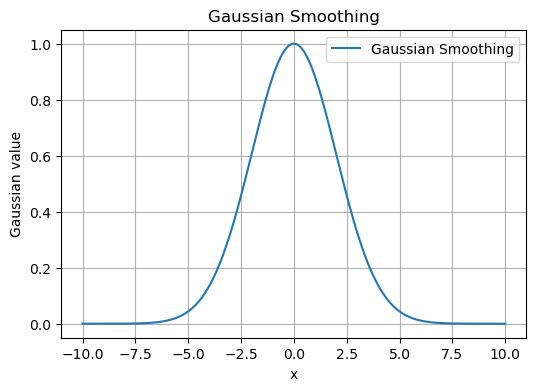

In [3]:
def plot_gaussian_smoothing():
    x = np.linspace(-10, 10, 400)
    gaussian = np.exp(-0.5 * (x**2) / 2**2)
    plt.figure(figsize=(6, 4))
    plt.plot(x, gaussian, label='Gaussian Smoothing')
    plt.title('Gaussian Smoothing')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Gaussian value')
    plt.grid(True)
    plt.show()

plot_gaussian_smoothing()

## Gradient (First Derivative of Gaussian)
Gradient (First Derivative of Gaussian)
This plot shows the gradient of the smoothed image. It highlights areas with potential edges by showing where the rate of intensity change is high. This step is sensitive to noise.


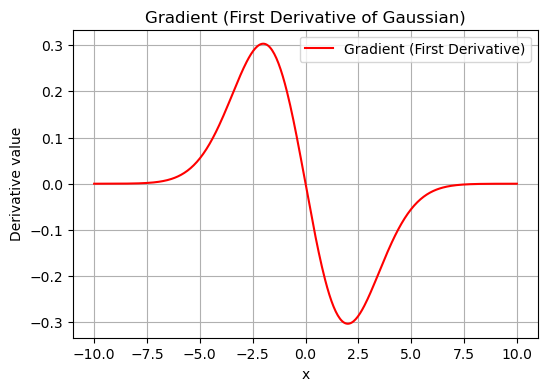

In [4]:
def plot_gradient():
    x = np.linspace(-10, 10, 400)
    gaussian = np.exp(-0.5 * (x**2) / 2**2)
    gaussian_derivative = -x / 2**2 * gaussian
    plt.figure(figsize=(6, 4))
    plt.plot(x, gaussian_derivative, color='red', label='Gradient (First Derivative)')
    plt.title('Gradient (First Derivative of Gaussian)')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Derivative value')
    plt.grid(True)
    plt.show()

plot_gradient()

## Laplacian of Gaussian (LoG)

### Concept
The Laplacian of Gaussian combines Gaussian smoothing with the Laplacian edge detection method. The Laplacian operator is a measure of the second derivative of the image, providing a clear indication of rapid changes in image intensity which correspond to edges.

### Laplacian of Gaussian (LoG) Derivation

#### Laplacian Operator
The Laplacian is a measure of the second derivative of the image, indicating areas of rapid intensity change:

$$
\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
$$

#### Combining Gaussian and Laplacian
The LoG operation involves applying the Laplacian to a Gaussian-smoothed image:

$$
LoG(x, y) = \nabla^2(G(x, y)) = \left[ \frac{x^2 + y^2 - 2\sigma^2}{2\pi\sigma^6} \right] e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

#### Derivation
The derivatives calculated are:

$$
\frac{\partial^2}{\partial x^2} G = \left( \frac{x^2 - \sigma^2}{\sigma^4} \right) \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

This expression is the same for \(y\), leading to the final form of LoG shown above.

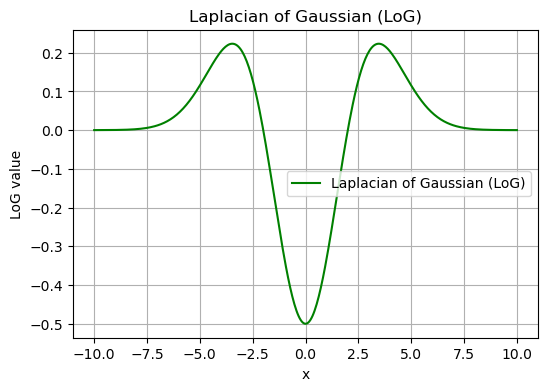

In [5]:
def plot_log():
    x = np.linspace(-10, 10, 400)
    gaussian = np.exp(-0.5 * (x**2) / 2**2)
    gaussian_double_derivative = (x**2 / 2**3 - 1 / 2) * gaussian
    plt.figure(figsize=(6, 4))
    plt.plot(x, gaussian_double_derivative, color='green', label='Laplacian of Gaussian (LoG)')
    plt.title('Laplacian of Gaussian (LoG)')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('LoG value')
    plt.grid(True)
    plt.show()

plot_log()

## Zero-Crossing Detection

### Edge Detection
The final step in the Marr-Hildreth algorithm is detecting zero-crossings of the LoG. A zero-crossing occurs where the sign of the Laplacian output changes, which usually corresponds to an edge.

### Implementation
This involves checking the change in sign of the Laplacian values across adjacent pixels. A change in sign indicates a potential edge presence.


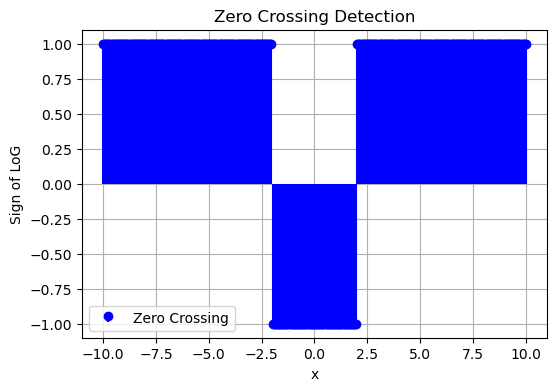

In [6]:
def plot_zero_crossing():
    x = np.linspace(-10, 10, 400)
    gaussian = np.exp(-0.5 * (x**2) / 2**2)
    gaussian_double_derivative = (x**2 / 2**3 - 1 / 2) * gaussian
    zero_crossing = np.sign(gaussian_double_derivative)
    plt.figure(figsize=(6, 4))
    plt.stem(x, zero_crossing, linefmt='blue', markerfmt='bo', basefmt=' ', label='Zero Crossing')
    plt.title('Zero Crossing Detection')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('Sign of LoG')
    plt.grid(True)
    plt.show()

plot_zero_crossing()

## Example:
### 1. Image generating
Let's create a simple synthetic image with gradients and shapes for this example.
The original image contains a white square and a gray circle on a black background. This simple composition helps illustrate how edges are detected.

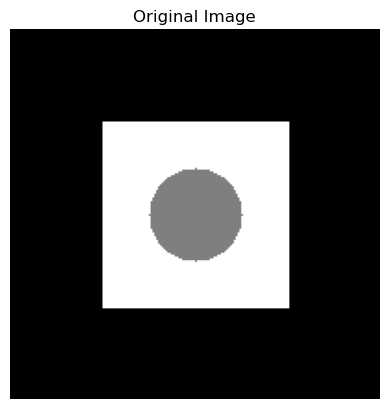

In [7]:
# Create and Display the Original Image
image = np.zeros((200, 200), dtype=np.uint8)
cv2.rectangle(image, (50, 50), (150, 150), (255), -1)
cv2.circle(image, (100, 100), 25, (127), -1)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

### 2. Apply Gaussian Blurring
The Gaussian blur smooths the image, reducing sharp transitions between the shapes and the background. This step is crucial for minimizing noise and preparing the image for edge detection.

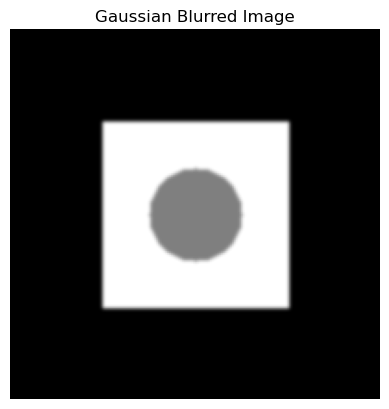

In [13]:
# Define the kernel size and standard deviation
kernel_size = (5, 5)
sigma = 1.0
# Apply Gaussian blur
gaussian_blurred = cv2.GaussianBlur(image, kernel_size, sigma)

# Display the blurred image
plt.imshow(gaussian_blurred, cmap='gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')
plt.show()

### 3. Compute the Laplacian (LoG)
The Laplacian operator is applied to the blurred image, highlighting areas where intensity changes abruptly. These regions potentially indicate edges. The result shows high intensities at the boundaries of the square and the circle.

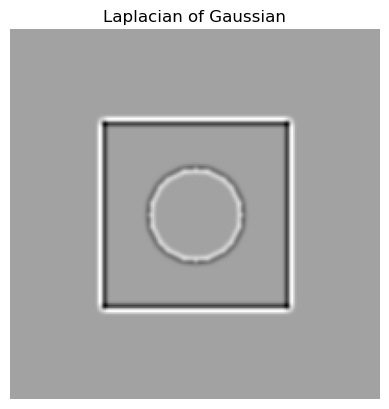

In [14]:
laplacian = cv2.Laplacian(gaussian_blurred, cv2.CV_64F, ksize=5)

# Visualize the Laplacian
plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian of Gaussian')
plt.axis('off')
plt.show()

### 4. Detect Zero-Crossings to Identify Edges
Finally, zero-crossing detection is applied to the Laplacian of the Gaussian image. This method identifies the edges by locating points where the Laplacian output changes sign. The resulting image clearly shows the outlines of the square and the circle, demonstrating the effectiveness of the Marr-Hildreth edge detection algorithm.

In [15]:
# Function to detect zero crossings
def zero_crossing(image):
    z_c_image = np.zeros(image.shape)

    # Get the dimensions of the image
    n, m = image.shape

    # Loop over each pixel in the image
    for i in range(1, n-1):
        for j in range(1, m-1):
            # Get the neighbors
            neg_neighbors = image[i+1, j] < 0 or image[i-1, j] < 0 or image[i, j+1] < 0 or image[i, j-1] < 0
            pos_neighbors = image[i+1, j] > 0 or image[i-1, j] > 0 or image[i, j+1] > 0 or image[i, j-1] > 0
            # Set pixel to 1 if there are both negative and positive neighbors
            if neg_neighbors and pos_neighbors:
                z_c_image[i, j] = 255

    return z_c_image

# Apply zero-crossing function
edges = zero_crossing(laplacian)



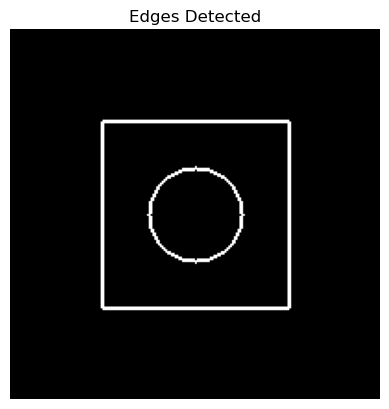

In [16]:
# Display edges
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected')
plt.axis('off')
plt.show()

## Application: Quantum Implementation of Classical Marr–Hildreth Edge Detection

### Introduction
The study published in Springer journals in 2020 investigates the adaptation of the classical Marr-Hildreth edge detection algorithm for quantum computing. This innovative approach seeks to leverage the potential of quantum mechanics to enhance digital image processing, particularly edge detection.

### Usage of the Marr-Hildreth Algorithm
The research primarily focuses on translating the conventional operations of the Marr-Hildreth algorithm, known for its Gaussian-Laplacian filter and zero-crossing method, into quantum computing processes.

### Role and Effectiveness
- **Role**: In classical computing, the Marr-Hildreth algorithm effectively detects edges in images by applying a Gaussian filter followed by a Laplacian filter to detect zero-crossings that signify edge boundaries. This study transposes these steps into quantum operations, which are expected to execute more efficiently on quantum hardware.
- **Effectiveness**: The quantum implementation aims to exploit quantum parallelism and superposition, potentially reducing the computational complexity and time required for edge detection in large-scale image processing tasks.


### Detailed Working Principles

#### Quantum Gaussian-Laplacian Filtering

- **Quantum Gaussian Smoothing**: The paper adapts the Gaussian smoothing technique for quantum circuits. This step involves encoding the image data onto qubits, the basic units of quantum information. Gaussian smoothing, essential for reducing noise before edge detection, is implemented using quantum operations that simulate the effect of a Gaussian filter on the probability amplitudes of quantum states.
  
- **Quantum Laplacian Filtering**: Following smoothing, a quantum version of the Laplacian filter is applied. This involves a second set of quantum operations designed to approximate the second derivative of the image intensity, crucial for detecting areas of rapid intensity change (edges) in the smoothed quantum image.


![The general framework of quantum circuit for Marr–Hildreth edge detection](./img/quantumckt.webp)

#### Quantum Zero-Crossing Detection

- **Encoding and Processing**: Zero-crossings—points where the Laplacian of Gaussian changes sign—are key to locating edges. In the quantum domain, this is handled by preparing a quantum state that represents the sign changes of the Laplacian filter output. The state's amplitude and phase are manipulated to highlight these zero crossings.
  
- **Quantum Measurement**: The final step involves measuring the quantum state to collapse it to a classical state that reveals the locations of edges. This measurement effectively translates the quantum information back into a form that can be interpreted classically as the positions of edges in the original image.



![Comparision](./img/comp.png)

## References

1. D. Marr and E. Hildreth, "Theory of edge detection," in *Proc. Royal Society of London. Series B, Biological Sciences*, vol. 207, no. 1167, pp. 187–217, 1980.
2. M. D. Heath, S. Sarkar, T. Sanocki, and K. W. Bowyer, "Comparison of edge detectors: A methodology and initial study," in *Proc. IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR)*, Seattle, WA, USA, pp. 143–148, 1994.
3. C. Harris and M. Stephens, "A combined corner and edge detector," in *Proc. of The Fourth Alvey Vision Conference*, Manchester, UK, pp. 147–151, 1988.
4. J. Canny, "A computational approach to edge detection," in *IEEE Transactions on Pattern Analysis and Machine Intelligence*, vol. PAMI-8, no. 6, pp. 679–698, Nov. 1986.
5. L. Zhang and P. Bao, "Real-time Marr-Hildreth edge detection using convolutional neural networks," in *Proc. IEEE International Conference on Image Processing (ICIP)*, Beijing, China, pp. 3209–3213, 2017.
6. T. Lindeberg, "Edge detection and ridge detection with automatic scale selection," in *International Journal of Computer Vision*, vol. 30, no. 2, pp. 117–156, 1998.
7. R. C. Gonzalez and R. E. Woods, *Digital Image Processing*, 4th ed. Pearson Education, 2018, ch. 10, "Edge Detection."
8. S. Minaee, A. Abdolrashidi, and Y. Wang, "Deep-edge: A deep learning approach to edge detection," in *Proc. IEEE Signal Processing in Medicine and Biology Symposium (SPMB)*, Philadelphia, PA, USA, pp. 1–6, 2019.